<a href="https://colab.research.google.com/github/thomasamged/stock-prediction/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
jainilcoder_netflix_stock_price_prediction_path = kagglehub.dataset_download('jainilcoder/netflix-stock-price-prediction')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,TimeSeriesSplit
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM , Dense,Dropout
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
df=pd.read_csv("/kaggle/input/netflix-stock-price-prediction/NFLX.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df["Date"]=pd.to_datetime(df["Date"])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


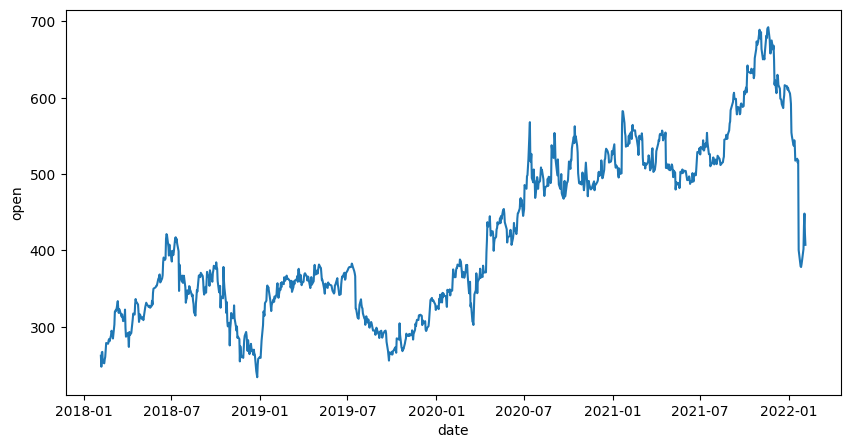

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'],df["Open"])
plt.xlabel("date")
plt.ylabel("open")
plt.show()

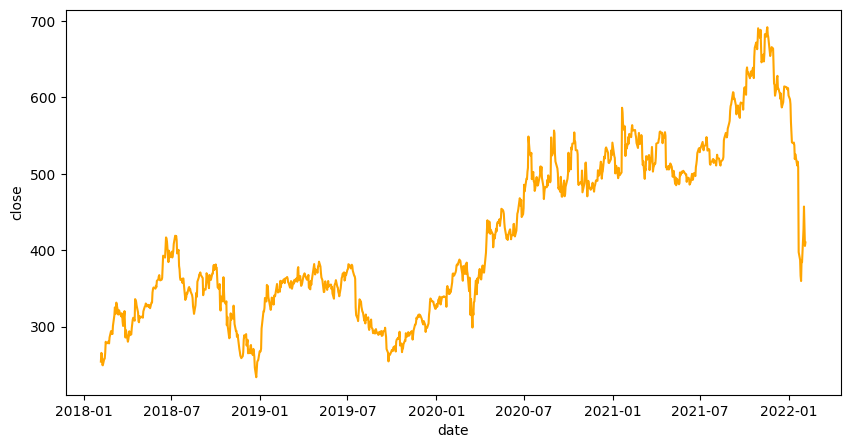

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'],df["Adj Close"],color="orange")
plt.xlabel("date")
plt.ylabel("close")
plt.show()

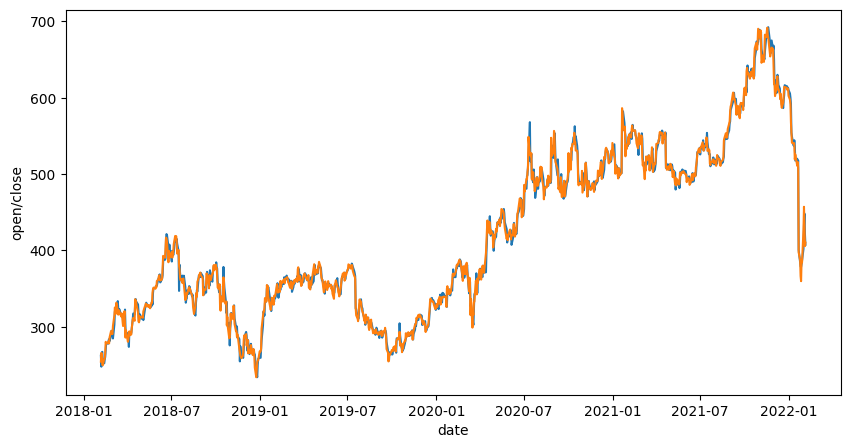

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'],df["Open"])
plt.plot(df['Date'],df["Adj Close"])
plt.xlabel("date")
plt.ylabel("open/close")
plt.show()

In [ ]:
df1=df["Adj Close"]

In [ ]:
mi=MinMaxScaler()
df1=mi.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [ ]:
trainsize=int(len(df1)*.70)
testsize=len(df1)-trainsize
traindata,testdata=df1[0:trainsize,:],df1[trainsize:len(df1),:]
traindata.shape
testdata.shape

(303, 1)

In [ ]:
def create_seq(data,time_step=60):
    X=[]
    y=[]
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step)])
        y.append(data[i+time_step])
    return np.array(X),np.array(y)

In [ ]:
X_train,y_train=create_seq(traindata,100)
X_test,y_test=create_seq(testdata,100)
X_test.shape

(202, 100, 1)

In [ ]:
model=Sequential()
model.add(LSTM(180,activation="relu",return_sequences=True,input_shape=(100,1)))
model.add(LSTM(120,activation="relu",return_sequences=True))
model.add(LSTM(100,activation="relu"))
model.add(Dropout(.5))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mean_squared_error")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history=model.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_test,y_test))

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 355ms/step - loss: 0.0668 - val_loss: 0.0820
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0140 - val_loss: 0.0158
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0084 - val_loss: 0.0260
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0080 - val_loss: 0.0148
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0082 - val_loss: 0.0222
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0073 - val_loss: 0.0099
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0062 - val_loss: 0.0105
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0065 - val_loss: 0.0085
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0056 - val_loss: 0.0082
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0061 - val_loss: 0.0122
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0059 - val_loss: 0.0093
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0

In [ ]:
p=model.predict(X_test)
print(mean_squared_error(y_test,p))

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step
0.005723573257942967


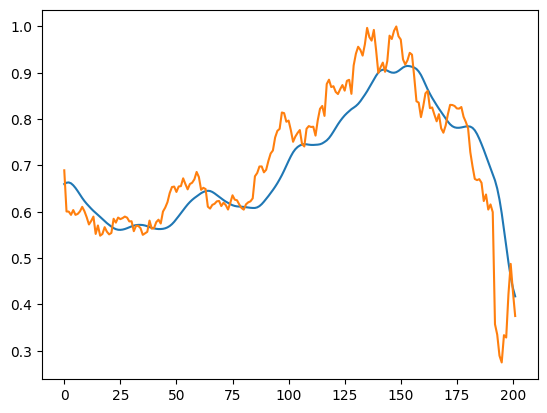

In [ ]:
plt.plot(p)
plt.plot(y_test)
plt.show()